In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

C:\Users\abdob\AppData\Local\Temp\ipykernel_26892\3412583630.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('ex1data1.txt', header=None)

In [3]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
x = data.iloc[:, 0]
y = np.asarray(data.iloc[:, 1]).reshape(-1, 1)
print(x.shape)
y.shape

(97,)


(97, 1)

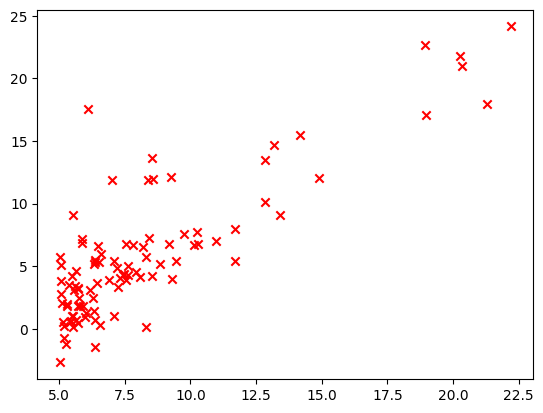

In [5]:
plt.scatter(x, y, marker='x', color='r')

In [6]:
X = np.asarray(x).reshape(-1, 1)
X = np.hstack((X, np.ones(X.shape)))
print(X.shape)

(97, 2)


In [7]:
print(X[:5])

[[6.1101 1.    ]
 [5.5277 1.    ]
 [8.5186 1.    ]
 [7.0032 1.    ]
 [5.8598 1.    ]]


In [8]:
theta = np.random.randn(2, 1)
theta

array([[ 0.76061321],
       [-1.71121754]])

In [9]:
def F(X, theta):
    return X.dot(theta)

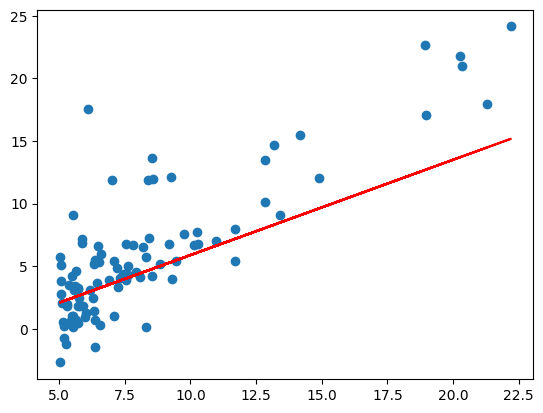

In [10]:
predictions = F(X, theta)

plt.scatter(x, y)
plt.plot(x, predictions, c='r')

In [11]:
F(X, theta)

array([[ 2.93620524],
       [ 2.4932241 ],
       [ 4.76814215],
       [ 3.61550889],
       [ 2.74582375],
       [ 4.66492694],
       [ 3.97543107],
       [ 4.81339864],
       [ 3.22227186],
       [ 2.13337799],
       [ 2.63241632],
       [ 9.06210797],
       [ 2.65013861],
       [ 4.68432258],
       [ 2.57917339],
       [ 2.38042516],
       [ 3.13038979],
       [ 2.19080429],
       [ 3.17922116],
       [ 3.66692635],
       [ 2.99629368],
       [13.70641224],
       [ 2.46462504],
       [ 3.10049769],
       [ 2.52151891],
       [12.69859973],
       [ 8.04592872],
       [ 6.62282141],
       [ 8.31062212],
       [15.17667757],
       [ 2.28382728],
       [ 3.30076715],
       [ 5.32308555],
       [ 2.77016337],
       [ 4.53425359],
       [ 4.3230313 ],
       [ 4.44663095],
       [ 2.5530083 ],
       [ 8.05201363],
       [ 3.12126243],
       [ 2.40134203],
       [ 3.52370288],
       [ 7.19404193],
       [ 2.68033495],
       [ 4.24035265],
       [ 3

In [12]:
def J_fonction_cout(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((F(X, theta) - y)**2)


In [13]:
J_fonction_cout(X, y, theta)

6.765733306053774

In [14]:

def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(F(X, theta) - y)

In [15]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations)
    
    for i in range(0, n_iterations):
        print(i)
        theta = theta - learning_rate * grad(X, y, theta) 
        cost_history[i] = J_fonction_cout(X, y, theta) 
        
    return theta, cost_history

In [16]:
n_iterations = 200
learning_rate = 0.01


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [17]:
theta_final

array([[ 1.03856545],
       [-2.35818492]])

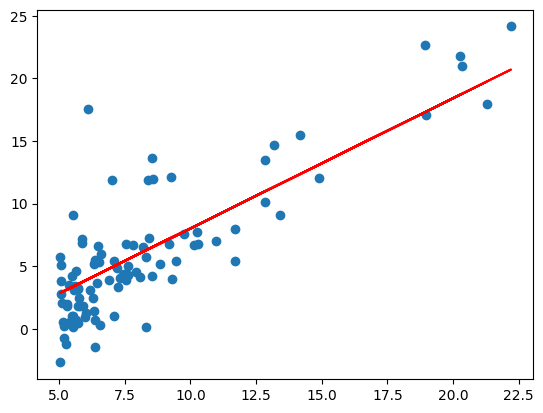

In [18]:
predictions = F(X, theta_final)

plt.scatter(x, y)
plt.plot(x, predictions, c='r')

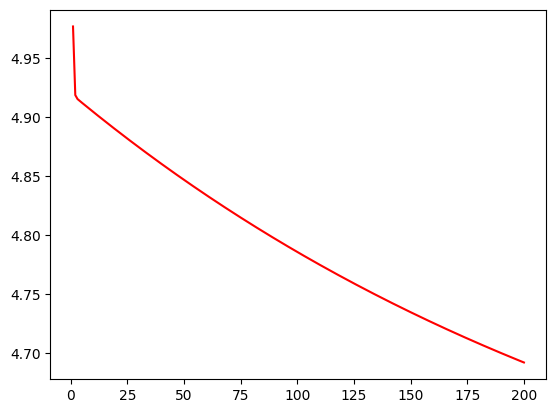

In [19]:
##plot the cost_history
plt.plot(range(1, n_iterations+1), cost_history, c='r')

In [20]:
J_fonction_cout(X, y, theta_final)

4.692206882091512

In [21]:
data = pd.read_csv('ex1data2.txt', header=None)
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [22]:
x_mul = np.asarray(data.iloc[:, 0:-1])
x_mul = np.hstack((x_mul, np.ones((x_mul.shape[0],1))))
y_mul = np.asarray(data.iloc[:, 1]).reshape(-1, 1)
print(x_mul.shape)
print(y_mul.shape)

theta = np.zeros((3, 1))
theta

(47, 3)
(47, 1)


array([[0.],
       [0.],
       [0.]])

In [23]:
n_iterations = 200
learning_rate = 0.01


theta_final, cost_history = gradient_descent(x_mul, y_mul, theta, learning_rate, n_iterations)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


C:\Users\abdob\AppData\Local\Temp\ipykernel_26892\2895478696.py:3: RuntimeWarning: overflow encountered in square
  return 1/(2*m) * np.sum((F(X, theta) - y)**2)
C:\Users\abdob\AppData\Local\Temp\ipykernel_26892\1375483896.py:7: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate * grad(X, y, theta)


In [24]:
predictions = F(x_mul, theta_final)

In [25]:
np.sum((F(x_mul, theta) - y_mul)**2)

499.0

In [26]:
J_fonction_cout(x_mul, y_mul, theta)

5.308510638297872